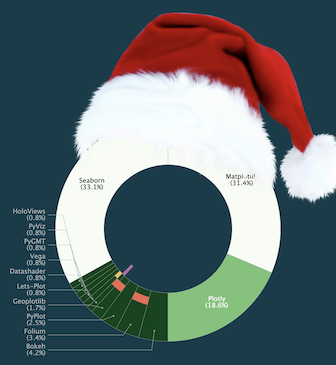

## Best Python Data Visualization Library According to One Non-Scientific Study

Data was collected from user responses to the ["What is the Best Python Data Visualization Library"](https://www.kaggle.com/discussions/questions-and-answers/364641) post in Kaggle's [QUESTIONS & ANSWERS](https://www.kaggle.com/discussions/questions-and-answers) forum.

The data collection and summarization was compiled on 6 Dec 2022.

In [1]:
# !pip install lets-plot

In [2]:
import pandas as pd
import numpy as np
from lets_plot import *

In [3]:
import lets_plot
lets_plot.__version__

'4.7.3'

In [4]:
LetsPlot.setup_html()
LetsPlot.set_theme(theme_bw())

In [5]:
# Name of the library.
name = [
    "Matplotlib",
    "Seaborn",
    "Plotly",
    "Vega",
    "Folium",
    "Bokeh",
    "Geoplotlib",
    "PyGMT",
    "PyViz",
    "Datashader",
    "HoloViews",
    "Lets-Plot",
    "PyPlot",
]

# The Score: total number of mentions minus duplicates (in the same post). 
score = [
    49 - 12,  # "Matplotlib"
    49 - 10,  # "Seaborn"
    35 - 13,  # "Plotly"
    1,  # "Vega"
    9 - 5,  # "Folium"
    6 - 1,  # "Bokeh"
    2,  # "Geoplotlib"
    1,  # "PyGMT"
    1,  # "PyViz"
    1,  # "Datashader"
    1,  # "HoloViews"
    1,  # "Lets-Plot"
    4 - 1,  # "PyPlot"
]

# The "Interactive Map" feature: "im" if library has built-in interactive mapping capabilities. 
interactive_map = [
    None,  # "Matplotlib"
    None,  # "Seaborn"
    None,  # "Plotly"
    None,  # "Vega"
    "im",  # "Folium"
    None,  # "Bokeh"
    "im",  # "Geoplotlib"
    None,  # "PyGMT"
    None,  # "PyViz"
    None,  # "Datashader"
    None,  # "HoloViews"
    "im",  # "Lets-Plot"
    None,  # "PyPlot"
]

# The "Geocoding" feature: "gc" if library has built-in geocoding capabilities. 
geo_coding = [
    None,  # "Matplotlib"
    None,  # "Seaborn"
    None,  # "Plotly"
    None,  # "Vega"
    None,  # "Folium"
    None,  # "Bokeh"
    None,  # "Geoplotlib"
    None,  # "PyGMT"
    None,  # "PyViz"
    None,  # "Datashader"
    None,  # "HoloViews"
    "gc",  # "Lets-Plot"
    None,  # "PyPlot"
]

# The "Large Data" feature: "ld" if library is large-data capable. 
large_data = [
    None,  # "Matplotlib"
    None,  # "Seaborn"
    None,  # "Plotly"
    None,  # "Vega"
    None,  # "Folium"
    None,  # "Bokeh"
    None,  # "Geoplotlib"
    None,  # "PyGMT"
    None,  # "PyViz"
    "ld",  # "Datashader"
    None,  # "HoloViews"
    None,  # "Lets-Plot"
    None,  # "PyPlot"
]


In [6]:
df_ = pd.DataFrame(dict(
        name=name,
        score=score,
        int_map=interactive_map,
        geo_coding=geo_coding,
        large_data=large_data
    )
)

df=df_.set_axis(["Name", "Score", "Interactive Map", "Geocoding", "Large Data"], axis=1)
df["Prop"] = (df["Score"] / df["Score"].sum())

df.head()


,Name,Score,Interactive Map,Geocoding,Large Data,Prop
0,Matplotlib,37,None,None,None,0.313559
1,Seaborn,39,None,None,None,0.330508
2,Plotly,22,None,None,None,0.186441
3,Vega,1,None,None,None,0.008475
4,Folium,4,im,None,None,0.033898


In [7]:
df = df.sort_values(
    by=["Score", "Interactive Map", "Geocoding", "Large Data"], 
    ascending=[False, True, True, True])
df.tail(10)

,Name,Score,Interactive Map,Geocoding,Large Data,Prop
5,Bokeh,5,None,None,None,0.042373
4,Folium,4,im,None,None,0.033898
12,PyPlot,3,None,None,None,0.025424
6,Geoplotlib,2,im,None,None,0.016949
11,Lets-Plot,1,im,gc,None,0.008475
9,Datashader,1,None,None,ld,0.008475
3,Vega,1,None,None,None,0.008475
7,PyGMT,1,None,None,None,0.008475
8,PyViz,1,None,None,None,0.008475
10,HoloViews,1,None,None,None,0.008475


In [8]:
p0 = (ggplot(df) +
      geom_pie(
          aes(slice="Score", fill="Score"),
          stat="Identity",
          labels=layer_labels().line("@Name\n(@Prop)").format("@Prop", ".1%"),
          hole=.5,
          stroke=.5, size=30)
)
p0

In [9]:
size=45
tooltips=layer_tooltips().title("@Name").format("@Score", ".0d")
score_pie = geom_pie(
          aes(slice="Score", fill="Score"),
          stat="Identity",
          tooltips=tooltips,
          labels=layer_labels().line("@Name\n(@Prop)").format("@Prop", ".1%"),
          show_legend=False,  
          stroke=.5, stroke_color="#98A6AB", 
          size=size,
          hole=0.57
)

feature_im_pie = geom_pie(
          aes(slice="Score", color="Interactive Map"), fill_by="color",
          stat="Identity",
          tooltips=tooltips,
          size=size*0.7,
          hole=0.9,
)

feature_ld_pie = geom_pie(
          aes(slice="Score", color="Large Data"), fill_by="color",
          stat="Identity",
          tooltips=tooltips,
          size=size*0.7*0.9,
          hole=0.9,
)

feature_gc_pie = geom_pie(
          aes(slice="Score", color="Geocoding"), fill_by="color",
          stat="Identity",
          tooltips=tooltips,
          size=size*0.7*0.9*0.9,
          hole=0.8,
)


WARN: The parameter 'stroke_color' for pie is no longer supported.


In [10]:
pie=(ggplot(df) + flavor_solarized_dark() +
 score_pie + 
 feature_gc_pie + 
 feature_im_pie + 
 feature_ld_pie + 
 ggsize(700, 900) +
 scale_fill_brewer(palette="Greens", direction=-1) + 
 scale_color_manual(
     values=["#EC6955", "#B26DA3", "#E7C060"],
     limits=["im", "gc", "ld"], 
     labels=["Interctive Map", "Geocoding", "Large Data"], 
     na_value="rgba(0, 0, 0, 0)") +
 theme(legend_title="blank", axis="blank", panel_grid="blank") +
 theme(legend_position=[0.5, .05], 
       legend_justification=[0.5, 1], 
       legend_direction='horizontal',
       legend_title=element_blank())
)

pie